# K-means Clustering Practice

### 라이브러리 설치 및 불러오기

In [116]:
# --- 라이브러리 설치 ---
import subprocess
import sys

def install_if_not_exists(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_if_not_exists("numpy")
install_if_not_exists("matplotlib")
install_if_not_exists("sklearn")
install_if_not_exists("pandas")


# --- 라이브러리 불러오기 ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_blobs, make_moons

# 문서 전체의 재현성을 위해 랜덤 시드를 고정합니다.
np.random.seed(0)

### 샘플 데이터 생성

In [117]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

### 생성된 데이터 시각화

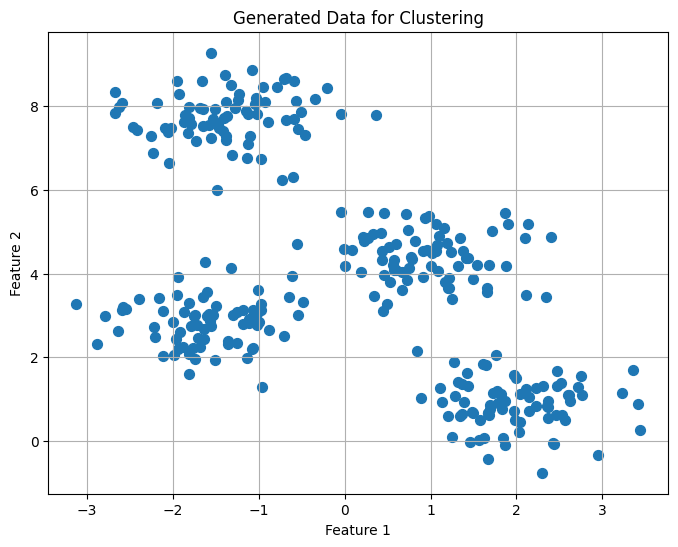

In [118]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

### K-평균 모델 학습

In [119]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

### 클러스터링 결과 시각화

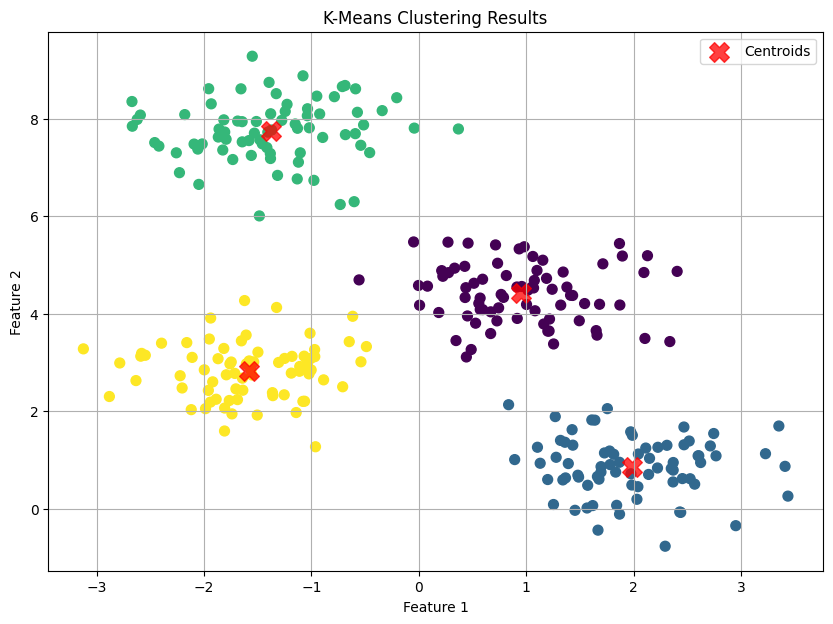

In [120]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

---
### MNIST 데이터 클러스터링 실습

#### MNIST 데이터 불러오기

In [121]:
with np.load('mnist.npz') as data:
    X_mnist = data['X']
    y_mnist = data['y']

print(f"로컬에서 MNIST 데이터 {X_mnist.shape[0]}개를 불러왔습니다.")
print(f"데이터 크기: {X_mnist.shape}")

로컬에서 MNIST 데이터 70000개를 불러왔습니다.
데이터 크기: (70000, 784)


#### K-평균 모델 학습 (MNIST)

Initialization complete
Iteration 0, inertia 4572952.269357938.
Iteration 1, inertia 2913453.555870522.
Iteration 2, inertia 2847380.866254315.
Iteration 3, inertia 2819924.9856512556.
Iteration 4, inertia 2803563.992322351.
Iteration 5, inertia 2790858.646935739.
Iteration 6, inertia 2782215.341603555.
Iteration 7, inertia 2776345.233743611.
Iteration 8, inertia 2772042.5218316703.
Iteration 9, inertia 2768627.1045753146.
Iteration 10, inertia 2765852.008503964.
Iteration 11, inertia 2763498.143401716.
Iteration 12, inertia 2761509.1531883166.
Iteration 13, inertia 2759777.0600243215.
Iteration 14, inertia 2758316.8354770057.
Iteration 15, inertia 2757074.435008371.
Iteration 16, inertia 2755987.6149655012.
Iteration 17, inertia 2755133.9591106.
Iteration 18, inertia 2754495.865547881.
Iteration 19, inertia 2753966.0644222777.
Iteration 20, inertia 2753514.941391723.
Iteration 21, inertia 2753041.1947221207.
Iteration 22, inertia 2752552.31005392.
Iteration 23, inertia 2751959.2653752

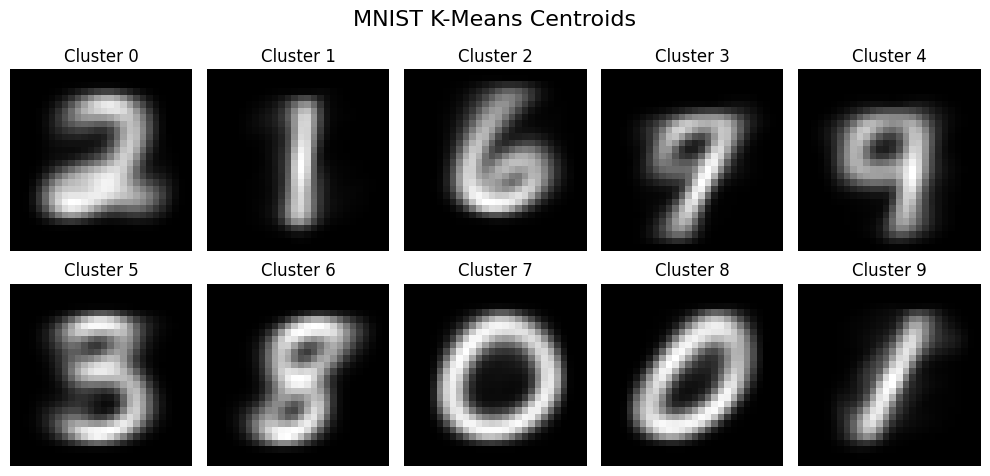

In [122]:
# n_init=1: 1번의 초기값으로 실행합니다.
# verbose=1: 학습 진행 상황을 출력하여 실시간으로 확인합니다.
mnist_kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, random_state=0, verbose=1)
mnist_kmeans.fit(X_mnist)

# 클러스터 중심(Centroid) 시각화
centroids_mnist = mnist_kmeans.cluster_centers_

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, centroid in enumerate(centroids_mnist):
    img = centroid.reshape(28, 28)
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].set_title(f'Cluster {i}')
    ax[row, col].axis('off')

plt.suptitle("MNIST K-Means Centroids", fontsize=16)
plt.tight_layout()
plt.show()

#### 결과 해석
위 시각화는 각 클러스터의 중심이 어떤 숫자 형태를 나타내는지 보여줍니다.
**중요**: K-평균 클러스터링은 비지도 학습이므로, 클러스터의 레이블(예: 'Cluster 0')이 실제 숫자의 레이블(예: '0')과 일치하지 않습니다.

---
### K-평균 알고리즘의 한계: 비선형 데이터
K-평균은 클러스터가 원형(spherical)이고 볼록(convex)할 것이라고 가정합니다.
이 때문에 길쭉하거나, 복잡한 모양의 데이터에는 잘 동작하지 않는 한계가 있습니다.
`make_moons` 데이터를 통해 이 한계를 확인해봅니다.

In [123]:
# 초승달 모양의 비선형 데이터 생성
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=0)

# K-평균 모델(K=2)을 생성하고 학습합니다.
kmeans_moons = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons)

#### 한계점 시각화

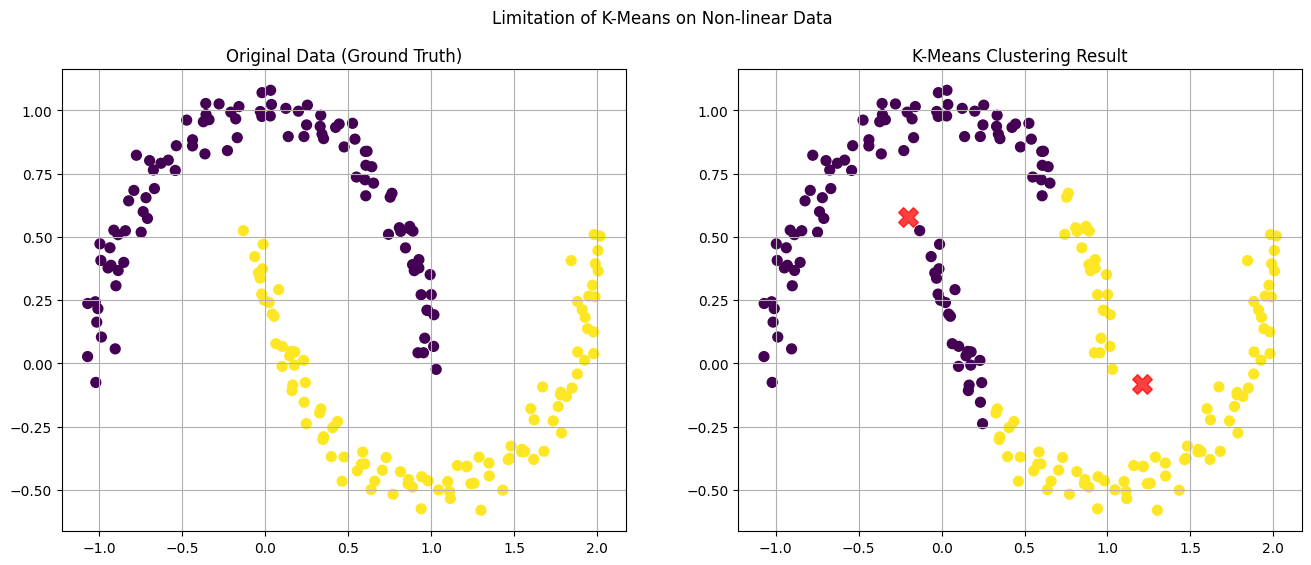

In [124]:
# 원본 데이터와 K-평균 클러스터링 결과를 나란히 시각화합니다.
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. 원본 데이터 (실제 그룹)
ax[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=50, cmap='viridis')
ax[0].set_title('Original Data (Ground Truth)')
ax[0].grid()

# 2. K-평균 클러스터링 결과
ax[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, s=50, cmap='viridis')
centers_moons = kmeans_moons.cluster_centers_
ax[1].scatter(centers_moons[:, 0], centers_moons[:, 1], c='red', s=200, alpha=0.75, marker='X')
ax[1].set_title('K-Means Clustering Result')
ax[1].grid()

plt.suptitle('Limitation of K-Means on Non-linear Data')
plt.show()